# Importing libraries and Model

In [18]:
import os, csv
from fastai.vision.all import *
from PIL import Image
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageWin
from IPython.display import display, Image, HTML

In [25]:
path = Path('insectaCamModel.pkl')
learn = load_learner(path)

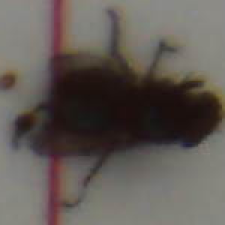

Image dimension: (225, 225)


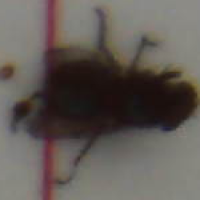

Image dimension: (200, 200)


In [18]:
import os
import csv
import tkinter as tk
from tkinter import filedialog
from tkinter import Tk, Canvas, Entry, Text, Button, PhotoImage
from PIL import Image as PilImage, ImageTk
from IPython.display import display, Image as IPImage, HTML
import easygui
from pathlib import Path

def update_image(ipath):
    global img
    # Apri l'immagine con PIL
    img = PilImage.open(ipath)
    display(img)
    print("Image dimension:", img.size)
    # Ridimensiona l'immagine
    
    img = img.resize((200,200))
    display(img)
    print("Image dimension:", img.size)
    # Converti l'immagine ridimensionata in PhotoImage
    #img = ImageTk.PhotoImage(img)
    #canvas.itemconfig(tagOrId=image_7, image=img)
    
def file_dialog():
    path = easygui.fileopenbox(msg="Choose file", title="InsectaCam",  filetypes = ["*.png", "*.jpg"], multiple=False, default="C:/Users/menga/Desktop/*.png")
    # Aggiungi questa linea per utilizzare il percorso del file selezionato
    update_image(path)


        
file_dialog()

# With single file

In [11]:
import easygui
path = easygui.fileopenbox(msg="Choose file", title="InsectaCam",  filetypes = ["*.png", "*.jpg"], multiple=True, default="\\*.png")

In [15]:
def choose_file():
    file_path = easygui.fileopenbox(msg="Choose file", title="InsectaCam",  filetypes = ["*.png", "*.jpg"], multiple=True, default="\\*.png")
    process_file(file_path)


def print_image(file_path):
    try:
        # Visualizza l'immagine
        display(Image(filename=file_path))
    except Exception as e:
        print(f"Error: {e}")


def parent_folder(file_path):
    try:
        folder = os.path.basename(os.path.dirname(file_path))
        return folder
    except Exception as e:
        print(f"Errore durante l'ottenimento della cartella: {e}")
        return None


def process_file(file_path):
    print("File selected:", file_path)
    print("Parent folder:", parent_folder(file_path))
    print_image(file_path)
    is_mosquito, _, probs = learn.predict(
        PILImage.create(file_path))  # Esegui la previsione
    # Stampa le probabilità per ogni classe
    print(f"Probability for Lucila: {probs[0]:.4f}")
    print(f"Probability for Mosca Domestica: {probs[1]:.4f}")
    print(f"Probability for Piofila: {probs[2]:.4f}")
    print("\n\n\n\n")
    
while True:
    choose_file()

File selected: ['C:\\Users\\menga\\Desktop\\Annunci subito\\IMG_5774.jpg']
Errore durante l'ottenimento della cartella: name 'os' is not defined
Parent folder: None
Error: name 'Image' is not defined


NameError: name 'learn' is not defined

# Generation csv for all file in a dataset for test

In [ ]:
source_folder = filedialog.askdirectory(title="Source folder")

for root, dirs, files in os.walk(source_folder):
    for file in files:
        if file.endswith(".png"):
            file_path = os.path.join(root, file).replace("\\", "/")
            process_file(file_path)


def print_image(file_path):
    try:
        # Visualizza l'immagine
        display(Image(filename=file_path))
    except Exception as e:
        print(f"Error: {e}")


def parent_folder(file_path):
    try:
        folder = os.path.basename(os.path.dirname(file_path))
        return folder
    except Exception as e:
        print(f"Errore durante l'ottenimento della cartella: {e}")
        return None


def process_file(file_path, csv_writer):
    print("File selected:", file_path)
    print("Parent folder:", parent_folder(file_path))
    #print_image(file_path)
    is_mosquito, _, probs = learn.predict(
        PILImage.create(file_path))  # Esegui la previsione
    # Stampa le probabilità per ogni classe
    print(f"Probability for Lucila: {probs[0]:.4f}")
    print(f"Probability for Mosca Domestica: {probs[1]:.4f}")
    print(f"Probability for Piofila: {probs[2]:.4f}")
    print("\n\n\n\n")

    # Scrivi i dati nel file CSV
    csv_writer.writerow({
        "File selected": file_path,
        "Parent folder": parent_folder(file_path),
        "Probability for Lucila": f"{probs[0]:.4f}",
        "Probability for Mosca Domestica": f"{probs[1]:.4f}",
        "Probability for Piofila": f"{probs[2]:.4f}"
    })


# Apri il file CSV in modalità di scrittura
csv_file_path = "/csv/output.csv"
with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
    # Definisci gli header del CSV
    fieldnames = [
        "File selected", "Parent folder",
        "Probability for Lucila", "Probability for Mosca Domestica", "Probability for Piofila"
    ]

    # Crea l'oggetto scrittore CSV
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Scrivi gli header nel file CSV
    csv_writer.writeheader()

    # Esegui il processo per ciascun file
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            if file.endswith(".png"):
                file_path = os.path.join(root, file).replace("\\", "/")
                process_file(file_path, csv_writer)

print("Scrittura completata. Il file CSV è stato salvato in:", csv_file_path)